In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from isochrones.mist import MISTEvolutionTrackGrid, MISTIsochroneGrid

Holoviews not imported. Some visualizations will not be available.
PyMultiNest not imported.  MultiNest fits will not work.


In [2]:
# grid = MISTEvolutionTrackGrid()
grid = MISTIsochroneGrid()
grid.df.head()

/home/alex/miniconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/alex/miniconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/alex/miniconda3/envs/thesis/lib/python3.9/site-packages/isochrones/models.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf.loc[:, "dm_deep"] = deriv


eep  age       feh      mass  initial_mass  \
log10_isochrone_age_yr feh  EEP                                               
5.0                    -4.0 35    35  5.0 -3.978406  0.100000      0.100000   
                            36    36  5.0 -3.978406  0.102885      0.102885   
                            37    37  5.0 -3.978406  0.107147      0.107147   
                            38    38  5.0 -3.978406  0.111379      0.111379   
                            39    39  5.0 -3.978406  0.115581      0.115581   

                                   radius   density   logTeff         Teff  \
log10_isochrone_age_yr feh  EEP                                              
5.0                    -4.0 35   1.106082  0.104181  3.617011  4140.105252   
                            36   1.122675  0.102504  3.618039  4149.909661   
                            37   1.147702  0.099918  3.619556  4164.436984   
                            38   1.173015  0.097284  3.621062  4178.903372   
                            39   1.198615  0.094623  3.622555  4193.289262   

                                     logg      logL      Mbol   delta_nu  \
log10_isochrone_age_yr feh  EEP                                            
5.0                    -4.0 35   3.350571 -0.489734  5.964335  37.987066   
                            36   3.347798 -0.472691  5.921728  37.739176   
                            37   3.343658 -0.447471  5.858678  37.345115   
                            38   3.339612 -0.422498  5.796244  36.923615   
                            39   3.335660 -0.397776  5.734440  36.473151   

                                     nu_max  phase   dm_deep  
log10_isochrone_age_yr feh  EEP                               
5.0                    -4.0 35   299.346079   -1.0  0.002885  
                            36   298.570836   -1.0  0.003573  
                            37   297.180748   -1.0  0.004247  
                            38   295.526946   -1.0  0.004217  
                            39   293.589960   -1.0  0.004189

In [40]:
# data = grid.df.drop(columns='initial_mass').reset_index().dropna()
data = grid.df.drop(columns="eep").reset_index(names=["logAge", "initial_feh", "eep"]).dropna()
data.head()

,logAge,initial_feh,eep,age,feh,mass,initial_mass,radius,density,logTeff,Teff,logg,logL,Mbol,delta_nu,nu_max,phase,dm_deep
0,5.0,-4.0,35,5.0,-3.978406,0.100000,0.100000,1.106082,0.104181,3.617011,4140.105252,3.350571,-0.489734,5.964335,37.987066,299.346079,-1.0,0.002885
1,5.0,-4.0,36,5.0,-3.978406,0.102885,0.102885,1.122675,0.102504,3.618039,4149.909661,3.347798,-0.472691,5.921728,37.739176,298.570836,-1.0,0.003573
2,5.0,-4.0,37,5.0,-3.978406,0.107147,0.107147,1.147702,0.099918,3.619556,4164.436984,3.343658,-0.447471,5.858678,37.345115,297.180748,-1.0,0.004247
3,5.0,-4.0,38,5.0,-3.978406,0.111379,0.111379,1.173015,0.097284,3.621062,4178.903372,3.339612,-0.422498,5.796244,36.923615,295.526946,-1.0,0.004217
4,5.0,-4.0,39,5.0,-3.978406,0.115581,0.115581,1.198615,0.094623,3.622555,4193.289262,3.335660,-0.397776,5.734440,36.473151,293.589960,-1.0,0.004189


In [41]:
# cond = (data['initial_mass'] >= 0.9) & (data['initial_mass'] < 1.9) & \
#     (data['initial_feh'] == 0.0) & \
#     (data['eep'] >= 250) & (data['eep'] < 450)  # ZAMS to TAMS
cond = (data['initial_feh'] >= -0.5) & (data['initial_feh'] < 0.5) & \
    (data['logAge'] >= 8.3)  # from 200 Myr to 20 Gyr

data['logR'] = np.log10(data['radius'])
data = data.loc[cond]
data.head()

,logAge,initial_feh,eep,age,feh,mass,initial_mass,radius,density,logTeff,Teff,logg,logL,Mbol,delta_nu,nu_max,phase,dm_deep,logR
643839,8.3,-0.5,167,8.3,-0.471841,0.100000,0.100000,0.134704,57.678330,3.507514,3217.466881,5.179387,-2.756539,11.631349,947.305260,22894.702882,-1.0,0.001890,-0.870621
643840,8.3,-0.5,168,8.3,-0.471841,0.101889,0.101890,0.135923,57.201142,3.508691,3226.194628,5.178217,-2.744008,11.600020,943.487863,22855.480234,-1.0,0.003287,-0.866708
643841,8.3,-0.5,169,8.3,-0.471840,0.106573,0.106573,0.139043,55.892303,3.511722,3248.793808,5.174997,-2.712168,11.520420,932.881284,22723.082400,-1.0,0.004700,-0.856851
643842,8.3,-0.5,170,8.3,-0.471839,0.111289,0.111290,0.142263,54.491609,3.514911,3272.734354,5.171722,-2.679528,11.438820,921.164273,22557.238080,-1.0,0.004731,-0.846908
643843,8.3,-0.5,171,8.3,-0.471838,0.116035,0.116035,0.145587,53.011566,3.518258,3298.054118,5.168372,-2.646077,11.355192,908.346424,22357.739381,-1.0,0.004761,-0.836877


In [42]:
data.age.unique()

array([ 8.3 ,  8.35,  8.4 ,  8.45,  8.5 ,  8.55,  8.6 ,  8.65,  8.7 ,
        8.75,  8.8 ,  8.85,  8.9 ,  8.95,  9.  ,  9.05,  9.1 ,  9.15,
        9.2 ,  9.25,  9.3 ,  9.35,  9.4 ,  9.45,  9.5 ,  9.55,  9.6 ,
        9.65,  9.7 ,  9.75,  9.8 ,  9.85,  9.9 ,  9.95, 10.  , 10.05,
       10.1 , 10.15, 10.2 , 10.25, 10.3 ])

In [8]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2023-03-26 19:05:25.108483: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-26 19:05:25.506236: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-26 19:05:25.510408: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-26 19:05:27.241885: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.0


In [43]:
# mask = np.isclose(data.initial_mass.values[:, None], np.arange(0.9, 1.94, 0.04))
mask = np.isclose(data.age.values[:, None], np.arange(8.3, 10.4, 0.1))

train = data.loc[mask].sample(frac=1)
test = data.drop(train.index)
# train = data.sample(frac=0.8, random_state=0)
# test = data.drop(train.index)

print('Train length = ', len(train))
print('Test length = ', len(test))

Train length =  126276
Test length =  120254


In [44]:
# input_cols = ['eep', 'initial_mass']
# output_cols = ['age', 'logTeff', 'logR']  # Note 'age' is log10('star_age') in years
input_cols = ['logAge', 'initial_mass', "initial_feh"]
output_cols = ['logTeff', 'logg']  # Note 'age' is log10('star_age') in years

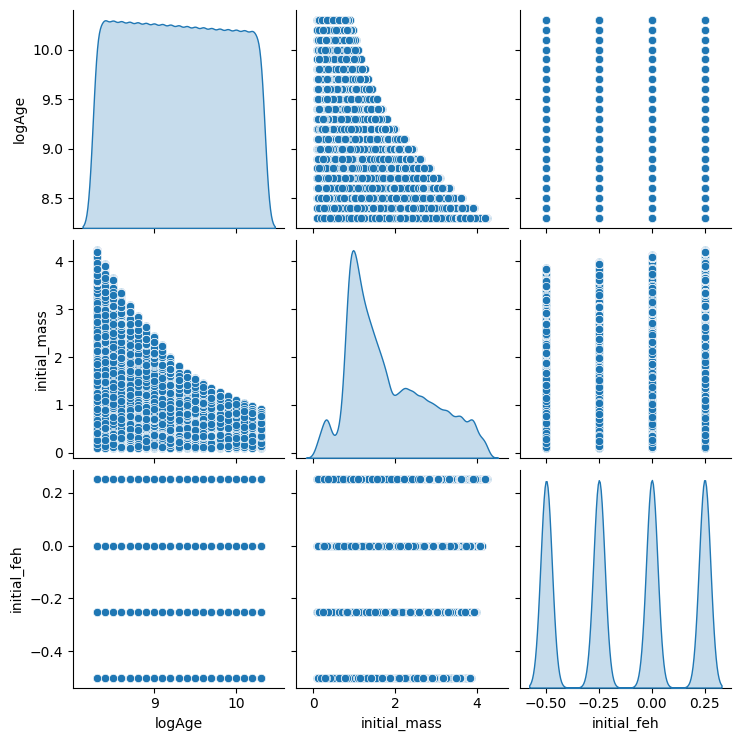

In [45]:
sns.pairplot(train[input_cols], diag_kind='kde')

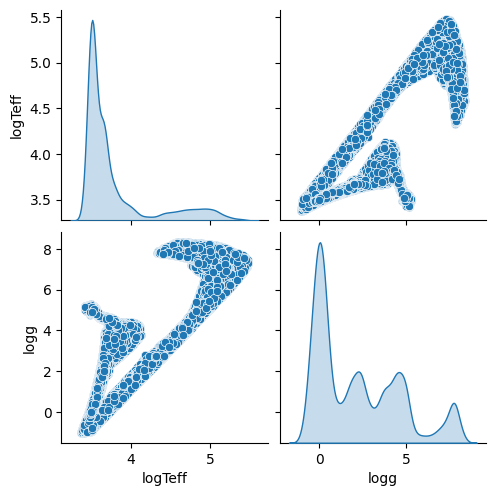

In [46]:
sns.pairplot(train[output_cols], diag_kind='kde')

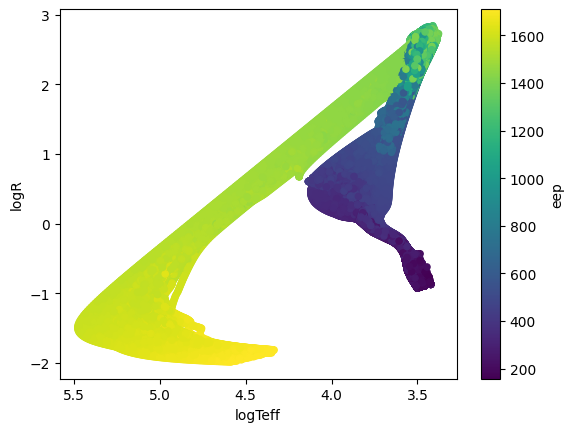

In [49]:
ax = train.plot(x="logTeff", y="logR", c="eep", kind="scatter", cmap="viridis")
ax.invert_xaxis()

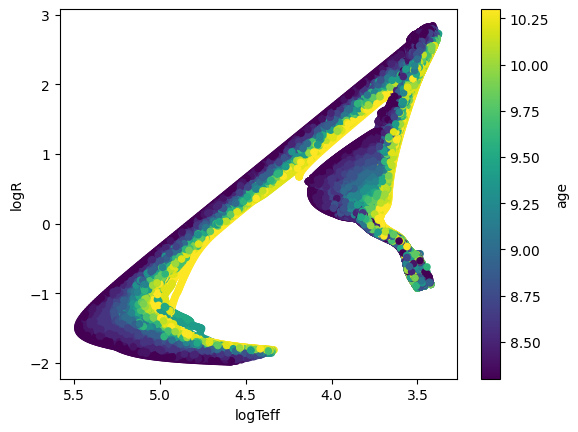

In [48]:
ax = train.plot(x="logTeff", y="logR", c="age", kind="scatter")
ax.invert_xaxis()

In [50]:
input_normalizer = preprocessing.Normalization()
input_normalizer.adapt(train[input_cols].to_numpy())

In [51]:
print(input_normalizer.mean.numpy())
print(input_normalizer.variance.numpy())

[[ 9.289005    1.8185854  -0.12453882]]
[[0.36656228 0.9717106  0.07812516]]


In [52]:
output_normalizer = preprocessing.Normalization()
output_normalizer.adapt(train[output_cols].to_numpy())

In [53]:
output_rescaler = preprocessing.Rescaling(scale=output_normalizer.variance, offset=output_normalizer.mean)

In [54]:
def build_model(n_neurons, n_hidden, activation='relu', reg=0):
    l2reg = keras.regularizers.L2(reg)
    hidden_layers = [layers.Dense(n_neurons, activation=activation, kernel_regularizer=l2reg) for layer in range(n_hidden)]
    all_layers = [input_normalizer] + hidden_layers + [layers.Dense(len(output_cols)), output_rescaler]
    model = keras.Sequential(all_layers)
    return model

In [55]:
model = build_model(64, 4)

model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(),
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 2)                 130       
                                                        

In [56]:
train.shape

(126276, 19)

In [58]:
epochs = 100
validation_split = 0.2
batch_size = 1024
len(train)%batch_size

324

In [59]:
%%time
history = model.fit(
    train[input_cols], train[output_cols],
    validation_split=validation_split,
    batch_size=batch_size,
    verbose=0, epochs=epochs,
)

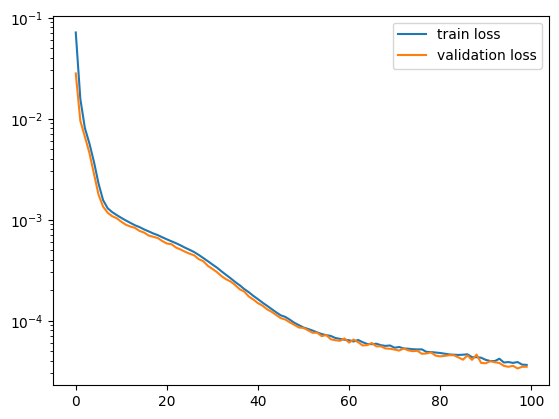

In [ ]:
sns.lineplot(x=history.epoch, y=history.history['loss'], label='train loss')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='validation loss')

plt.yscale('log')
plt.legend()

Text(0.5, 1.0, 'validation loss')

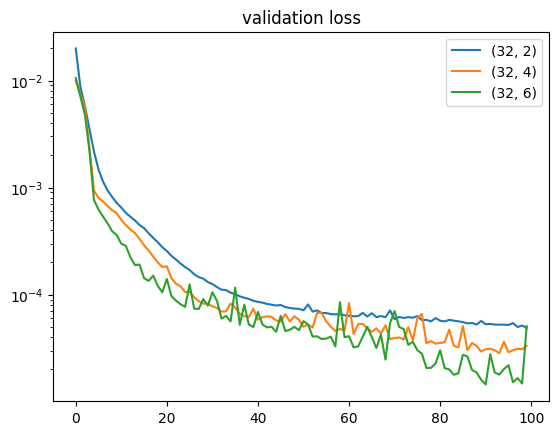

In [276]:
architectures = [(32, 2), (32, 4), (32, 6)]
histories = []

for arch in architectures:
  model = build_model(*arch)
  model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam())
  histories.append(model.fit(
      train[input_cols], train[output_cols],
      validation_split=validation_split,
      batch_size=batch_size,
      verbose=0, epochs=epochs,
  ))

for history, arch in zip(histories, architectures):
  sns.lineplot(x=history.epoch, y=history.history['val_loss'], label=arch)

plt.yscale('log')
plt.legend()
plt.title('validation loss')

Text(0.5, 1.0, 'validation loss')

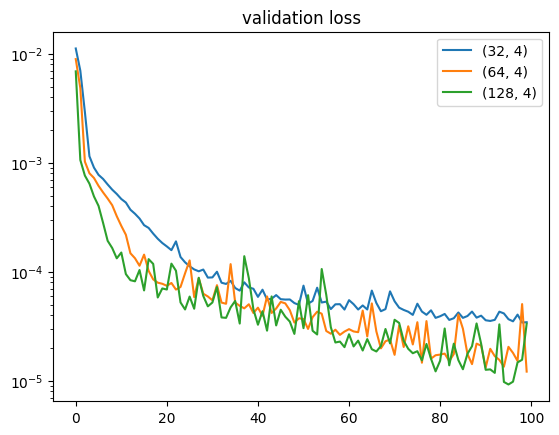

In [277]:
architectures = [(32, 4), (64, 4), (128, 4)]
histories = []

for arch in architectures:
  model = build_model(*arch)
  model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam())
  histories.append(model.fit(
      train[input_cols], train[output_cols],
      validation_split=validation_split,
      batch_size=batch_size,
      verbose=0, epochs=epochs,
  ))

for history, arch in zip(histories, architectures):
  sns.lineplot(x=history.epoch, y=history.history['val_loss'], label=arch)

plt.yscale('log')
plt.legend()
plt.title('validation loss')

Text(0.5, 1.0, 'validation loss')

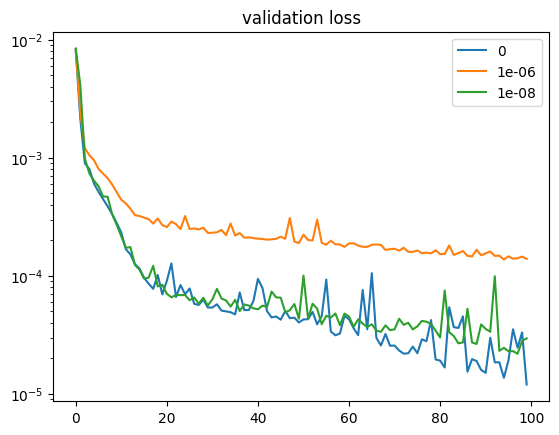

In [279]:
arch = (64, 4)
regs = [0, 1e-6, 1e-8]
histories = []

for reg in regs:
  model = build_model(*arch, reg=reg)
  model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam())
  histories.append(model.fit(
      train[input_cols], train[output_cols],
      validation_split=validation_split,
      batch_size=batch_size,
      verbose=0, epochs=epochs,
  ))
  
for history, reg in zip(histories, regs):
  sns.lineplot(x=history.epoch, y=history.history['val_loss'], label=reg)

plt.yscale('log')
plt.legend()
plt.title('validation loss')

In [291]:
model = build_model(64, 4, reg=0)

model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(),
)
model.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 2)                5         
 ion)                                                            
                                                                 
 dense_271 (Dense)           (None, 64)                192       
                                                                 
 dense_272 (Dense)           (None, 64)                4160      
                                                                 
 dense_273 (Dense)           (None, 64)                4160      
                                                                 
 dense_274 (Dense)           (None, 64)                4160      
                                                                 
 dense_275 (Dense)           (None, 3)                 195       
                                                     

In [302]:
%%time
history = model.fit(
    train[input_cols], train[output_cols],
    validation_split=validation_split,
    batch_size=batch_size,
    verbose=0, epochs=1000,
)

CPU times: user 3min 28s, sys: 1min 15s, total: 4min 43s
Wall time: 2min 22s


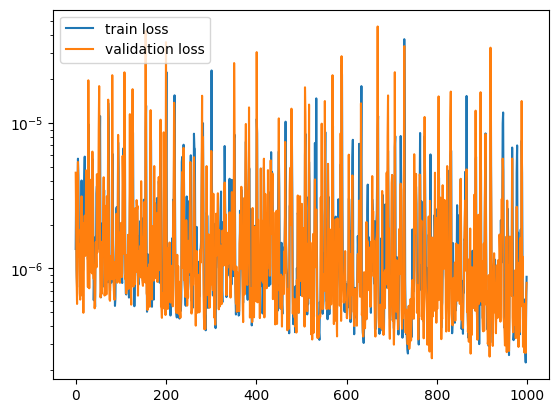

In [303]:
sns.lineplot(x=history.epoch, y=history.history['loss'], label='train loss')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='validation loss')

plt.yscale('log')
plt.legend()

In [304]:
pred = pd.DataFrame(
    model(test[input_cols]),
    columns=output_cols
)

In [305]:
err = test[output_cols].reset_index(drop=True) - pred
err

,age,logTeff,logR
0,-0.004540,0.000344,0.000493
1,-0.004773,0.000365,0.000551
2,-0.004951,0.000370,0.000534
3,-0.003707,0.000311,0.000445
4,-0.003175,0.000254,0.000387
...,...,...,...
4995,0.002436,0.000833,-0.002459
4996,0.002308,0.000909,-0.002508
4997,0.002205,0.001015,-0.002421
4998,0.002124,0.001142,-0.002260


In [306]:
from isochrones.interp import DFInterpolator

In [307]:
interp = DFInterpolator(train.set_index(keys=input_cols)[output_cols])

In [308]:
pred_interp = pd.DataFrame(
    interp(test[input_cols].values.T),
    columns=output_cols
)

In [309]:
err_interp = test[output_cols].reset_index(drop=True) - pred_interp
err_interp

,age,logTeff,logR
0,-0.006077,0.000137,-0.000125
1,-0.006573,0.000139,-0.000127
2,-0.007038,0.000141,-0.000129
3,-0.006116,0.000141,-0.000127
4,-0.005593,0.000142,-0.000125
...,...,...,...
4995,-0.000219,0.000627,-0.001538
4996,-0.000221,0.000631,-0.001498
4997,-0.000223,0.000634,-0.001458
4998,-0.000226,0.000635,-0.001418


In [310]:
error = pd.concat(
    {"NN": err, "Interp": err_interp},
    names=["method"]
).reset_index(level=0).reset_index(drop=True)
error

,method,age,logTeff,logR
0,NN,-0.004540,0.000344,0.000493
1,NN,-0.004773,0.000365,0.000551
2,NN,-0.004951,0.000370,0.000534
3,NN,-0.003707,0.000311,0.000445
4,NN,-0.003175,0.000254,0.000387
...,...,...,...,...
9995,Interp,-0.000219,0.000627,-0.001538
9996,Interp,-0.000221,0.000631,-0.001498
9997,Interp,-0.000223,0.000634,-0.001458
9998,Interp,-0.000226,0.000635,-0.001418


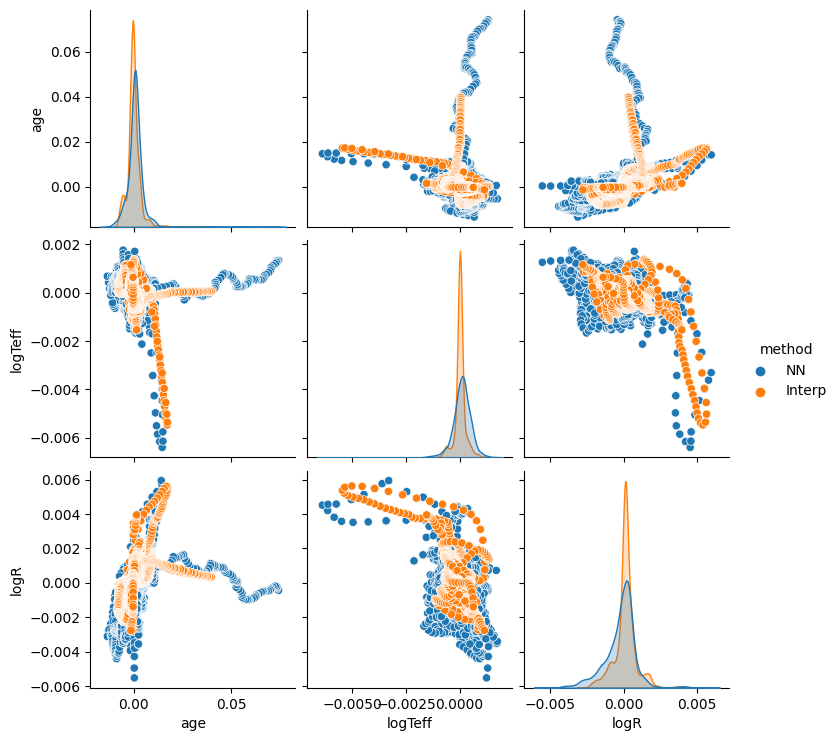

In [311]:
sns.pairplot(error, hue="method", diag_kind='kde')